# AIDS dataset: Degeneration effect - repeated avatarization

In order to look at the effect of an avatarization, we repeat the avatarization on an avatar dataset with `k = 20`.  

This notebook displays avatarization results of the AIDS dataset over iterations.  
To visualize the results, we displayed the FAMD projections in the original data space of avatars.

## Packages import 

In [1]:
# Main importation
import pandas as pd
import seaborn as sns
from matplotlib import patches, pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np
from matplotlib.patches import Patch
import sys
import saiph

# Imputation function import 
from sklearn.impute import KNNImputer



##  Loading

In [2]:
df = pd.read_csv("../../datasets/AIDS/aids_original_data.csv", sep = ";")
df.drop(columns = "pidnum", inplace = True)

categorical_val = []
continous_val = []
for column in df.columns :
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

df[categorical_val] = df[categorical_val].astype("category")

In [3]:

df_all = pd.read_csv("../../datasets/messageD/aids.csv.tar.bz2", compression='bz2', header=0)
df_all.rename(columns = {'./aids.csv':'age'}, inplace=True)


In [4]:
# select specifics iterations

df_0 = df_all[df_all["iter"] == 0]  # original data
df_1 = df_all[df_all["iter"] == 1]
df_2 = df_all[df_all["iter"] == 2]
df_3 = df_all[df_all["iter"] == 3]
df_5 = df_all[df_all["iter"] == 5]
df_7 = df_all[df_all["iter"] == 7]
df_10 = df_all[df_all["iter"] == 10]

# Impute missing data in order to project the avatars in the multidimensionnal space.
df_0_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_0),
                        columns = df_0.columns.values)
df_0_imp[categorical_val] = df_0_imp[categorical_val].astype("category")
df_1_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_1),
                        columns = df_0.columns.values)
df_1_imp[categorical_val] = df_1_imp[categorical_val].astype("category")
df_2_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_2),
                        columns = df_0.columns.values)
df_2_imp[categorical_val] = df_2_imp[categorical_val].astype("category")
df_3_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_3),
                        columns = df_0.columns.values)
df_3_imp[categorical_val] = df_3_imp[categorical_val].astype("category")
df_5_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_5),
                        columns = df_0.columns.values)
df_5_imp[categorical_val] = df_5_imp[categorical_val].astype("category")
df_7_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_7),
                        columns = df_0.columns.values)
df_7_imp[categorical_val] = df_7_imp[categorical_val].astype("category")
df_10_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_10),
                         columns = df_0.columns.values)
df_10_imp[categorical_val] = df_10_imp[categorical_val].astype("category")


## Multdimensionnal projection function.

This section use projection function (such as FAMD) to project the avatar data in the original data space.

In [5]:
palette = sns.light_palette("#02297a", as_cmap=True)

def projection_plot(records_set, avatars_set, variable_visualization, iter, palette = palette, ax = None) :
    """
    Project the avatar dataset as supplemental individuals in the original daataset.
    Can color the individuals with a variable.
    input :
    - records_set : original dataset
    - avatars_set : avatar dataset
    - iter : the iteration number
    - palette : a color palette

    output:
    - ax1 : the projection of the avatar dataset.
    """
    records_set.drop(columns = ['iter'], inplace = True)
    avatars_set.drop(columns = ['iter'], inplace = True)
    
    # add a new fake indivudal in order to fix the plot scale during iteration
    new_ind = [48, 8009.8128, 0, 0, 0, 100, 0, 0, 1, 1500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    new_ind = pd.Series(new_ind, index = avatars_set.columns)
    avatars_set = avatars_set.append(new_ind, ignore_index = True)

    # perform projection
    __, mod, param = saiph.fit(records_set, nf = 3)
    avat_coordinates = saiph.transform(avatars_set, mod, param) # project avatar in the original space 
    avat_coordinates["Dim. 1"] = - avat_coordinates["Dim. 1"]
    var1 = mod.explained_var_ratio[0] * 100
    var2 = mod.explained_var_ratio[1] * 100

    avat_coordinates["modality"] = avatars_set[variable_visualization]
    ax1 = ax or plt.gca()
    
    # general set up 
    paper_rc = {"lines.markersize": 11}
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale = 2, rc = paper_rc)
    with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]

    ax1.scatter(avat_coordinates["Dim. 1"], avat_coordinates["Dim. 2"],
                         edgecolors = "black", c = avat_coordinates["modality"], s = 75, cmap = palette)
    
    # setup x, y limits, labs and legend
    ax1.set_xlim(avat_coordinates["Dim. 1"].min() - 0.2, avat_coordinates["Dim. 1"].max() + 0.2)
    ax1.set_ylim(avat_coordinates["Dim. 2"].min() - 0.2, avat_coordinates["Dim. 2"].max() + 0.2)
    ax1.set_xlabel("Dim. 1 (" + str(round(var1)) + "%)")
    ax1.set_ylabel("Dim. 2 (" + str(round(var2)) + "%)")
    ax1.set(xlim = (-6, 6))
    ax1.set(ylim = (-6, 6))
    

    
    ax1.set_title("Iteration: {}".format(iter))
    return ax1

## Iterations vizualisation

Here we iterated the visualization over avatar generations.

/tmp/ipykernel_848756/3498753538.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avatars_set = avatars_set.append(new_ind, ignore_index = True)
/tmp/ipykernel_848756/3498753538.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avatars_set = avatars_set.append(new_ind, ignore_index = True)
/tmp/ipykernel_848756/3498753538.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avatars_set = avatars_set.append(new_ind, ignore_index = True)
/tmp/ipykernel_848756/3498753538.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avatars_set = avatars_set.append(new_ind, ignore_index = True)
/tmp/ipykernel_848756/3498753538.py:22: FutureWa

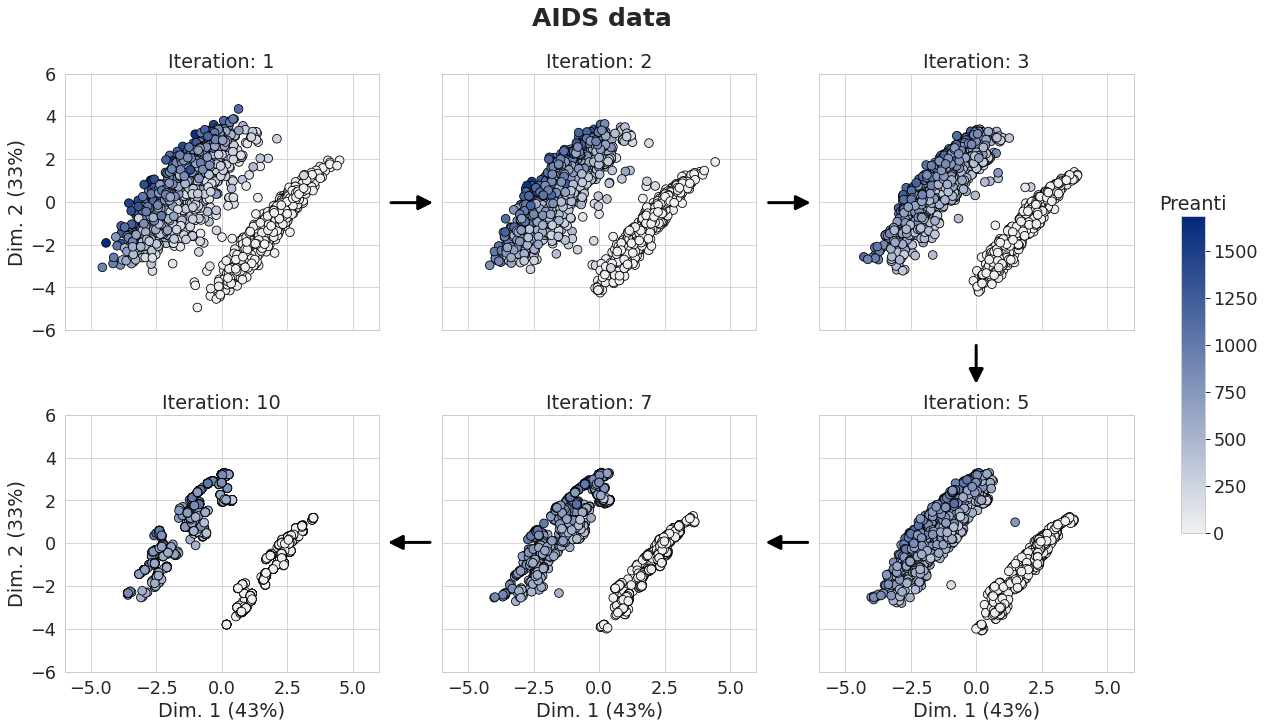

In [6]:
## visualization context
paper_rc = {"lines.markersize": 11}
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 2, rc = paper_rc)
with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]
        
fig, axs = plt.subplots(2, 3, figsize = (22, 11))

# link avatar dataframe to the position in the subplot
list = [(df_1_imp, 1, axs[0, 0]),
        (df_2_imp, 2, axs[0, 1]),
        (df_3_imp, 3, axs[0, 2]),
        (df_5_imp, 5, axs[1, 2]),
        (df_7_imp, 7, axs[1, 1]),
        (df_10_imp, 10, axs[1, 0])]

# make the projection 
for df_temp in list:
    projection_plot(df_0_imp.copy(), df_temp[0].copy(), "preanti", df_temp[1], ax = df_temp[2])


# Add arrow from one subplot to the other
# list all arrow position ([x_start, y_start],[x_end, y_end])
axs_list = [ axs[0, 0],  axs[0, 1],  axs[0, 2],  axs[1, 2],  axs[1, 1],  axs[1, 0]]
xy_list = [([4.85, 0.3], [-8.15, 0.3]), ([3, 0.3], [-10, 0.3]), ([-4.5, -6], [-4.5, 6.7]), 
           ([-10.1, -0.3], [2.9, -0.3]), ([-8.25, -0.3], [4.75, -0.3])]

# Draw all the arrows
for i in range(len(axs_list)-1):
    xyA = xy_list[i][0]
    xyB = xy_list[i][1]
    
    axs_list[i].plot(*xyA)
    axs_list[i+1].plot(*xyB)

    transFigure = fig.transFigure.inverted()
    coord1 = transFigure.transform(axs_list[i].transData.transform(xyA))
    coord2 = transFigure.transform(axs_list[i+1].transData.transform(xyB))
    arrow = patches.FancyArrowPatch(
        coord1,  # posA
        coord2,  # posB
        shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        shrinkB=0,  # so head is exactly on posB (default shrink is 2)
        transform=fig.transFigure,
        color="black",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
    fig.patches.append(arrow)

# add space between each subplot
plt.subplots_adjust(hspace=0.33, wspace=0.2, right=0.8)

# put label outer the axis 
for ax in fig.get_axes():
    ax.label_outer()


# Add preanti color bar legend on the right side
norm = plt.Normalize(df_1_imp['preanti'].min(), df_1_imp['preanti'].max())
sm =  ScalarMappable(norm=norm, cmap=palette)
sm.set_array([])
cb_ax = fig.add_axes([0.83, 0.3, 0.015, 0.4])  # [Left, bottom, width, height]
cbar = fig.colorbar(sm, ax=axs[:,2], cax=cb_ax)
cbar.ax.set_title("Preanti")


# General title
plt.gcf().text(0.42, 0.94, "AIDS data", fontsize=25, weight = 'bold', family = "sans-serif")

# save the fig if needed
# plt.savefig("../../figure/aids_MESSAGED/aids_iterations.svg", format = "svg", bbox_inches='tight')
plt.show()


##  Perform variability conservation

In [13]:
def compute_metrics(ref_df, df, results): 
    """Compute metrics of variability variation between reference and avatarized Dataframe."""
    coord, model, param = saiph.fit(ref_df.drop(columns=["iteration", "repetition"]), nf = 2) 
    avat_coordinates = saiph.transform(df.drop(columns=["iteration", "repetition"]), model, param) # project avatar in the original space
    
    df = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df),
                        columns = df.columns.values)

    for dimension in ["Dim. 1", "Dim. 2"]:
        # All class
        standard_deviation = avat_coordinates[dimension].std()
        std_original = coord[dimension].std()
        raw = [standard_deviation/std_original, standard_deviation, df["iteration"].unique()[0], "all", dimension,  df["repetition"].unique()[0]]
        results.append(raw)


    return results




In [50]:
dfs = pd.read_csv("../../datasets/AIDS/iterations.csv.tar.bz2", compression="bz2")
dfs.drop(columns = 'iterations.csv', inplace=True)

df_init = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(dfs[dfs["iteration"] == 0]),
                        columns = dfs[dfs["iteration"] == 0].columns.values)
init = []
init = compute_metrics(
            df_init,
           df_init,
            results=init, 
            )

results = []
for iteration in range(1, 11): 
    for repetition in range(1,11): 
        subset = dfs[(dfs["iteration"] == iteration) & (dfs["repetition"] == repetition)]
        results = compute_metrics(
            df_init,
            subset,
            results=results, 
        )


results = init + results

results = pd.DataFrame(results, columns=["percentage", "std", "iteration", "modality", "dimension", "repetition"])
results["percentage"] = results["percentage"] * 100


In [52]:
def plot_variability_percentage(data, dimension, y, y_label, axs):

    axs = axs or plt.gca()
    sns.lineplot(data=data[data["dimension"] == dimension], 
                x="iteration", 
                y=data[y], 
                hue="modality", 
                ci = 95, 
                palette = ["#02297a"],
                ax=axs
                )
    axs.set(
        title=dimension
        )
    axs.get_legend().remove()
    if y == "percentage":
        axs.set_ylim(37, 103)

    axs.set_ylabel(y_label)
    fig.suptitle("Variability conservation across avatarization iterations")


/tmp/ipykernel_848756/325779997.py:20: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


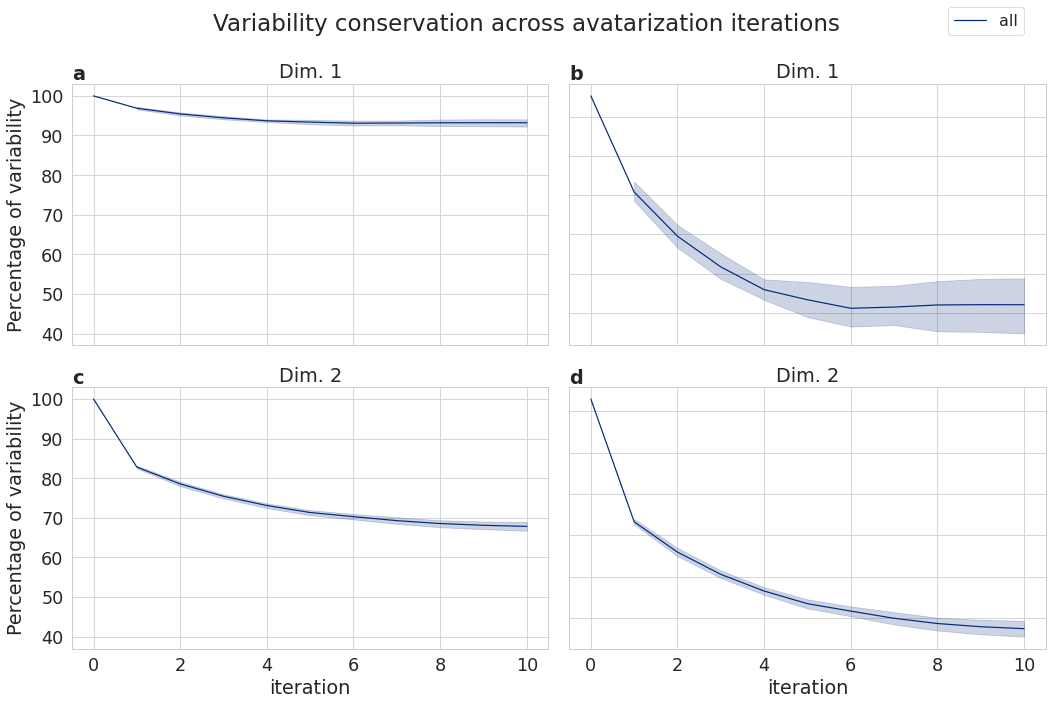

In [53]:
fig, axs = plt.subplot_mosaic([['a', 'b'], ['c', 'd'],],
                              constrained_layout=True, figsize = (15, 10))

plot_variability_percentage(results, "Dim. 1", "percentage", 'Percentage of variability', axs=axs['a'])
plot_variability_percentage(results, "Dim. 1", "std", 'Standard deviation', axs=axs['b'])
plot_variability_percentage(results, "Dim. 2", "percentage", 'Percentage of variability', axs=axs['c'] )
plot_variability_percentage(results, "Dim. 2", "std", 'Standard deviation', axs=axs['d'] )

# Add the legend
handles, _ = axs['d'].get_legend_handles_labels()
fig.legend(loc = (0.9, 0.95), labels = ["all"], handles = handles[:], ncol=1,  prop={'size': 16})

for label, ax in axs.items():
    ax.text(0.0, 1.0, label, transform=ax.transAxes,
            fontsize='medium', va='bottom', fontfamily='sans-serif',weight='bold')
    ax.label_outer()



plt.tight_layout()

# Save figure if necessary
plt.savefig("../../figure/aids_MESSAGED/aids_iterations_variability.svg", format = "svg")


plt.show()

In [54]:
aggregated = results.groupby(['iteration', 'dimension', 'modality']).agg({'percentage': ['mean','count', 'std'], 'std': ['mean','count', 'std'] })

In [56]:
# aggregated.to_csv("../../../Downloads/aids_aggregated.csv", index=False)

In [57]:
aggregated

percentage                       std        \
                                    mean count       std      mean count   
iteration dimension modality                                               
0.0       Dim. 1    all       100.000000     1       NaN  1.963312     1   
          Dim. 2    all       100.000000     1       NaN  1.730260     1   
1.0       Dim. 1    all        96.879423    10  0.539867  1.902045    10   
          Dim. 2    all        82.800622    10  0.659861  1.432666    10   
2.0       Dim. 1    all        95.447033    10  0.640264  1.873923    10   
          Dim. 2    all        78.560735    10  0.991038  1.359305    10   
3.0       Dim. 1    all        94.450425    10  0.700173  1.854357    10   
          Dim. 2    all        75.442453    10  0.891642  1.305351    10   
4.0       Dim. 1    all        93.711608    10  0.567846  1.839851    10   
          Dim. 2    all        73.107759    10  0.960628  1.264954    10   
5.0       Dim. 1    all        93.383352    10  0.980234  1.833407    10   
          Dim. 2    all        71.336234    10  1.106959  1.234303    10   
6.0       Dim. 1    all        93.107441    10  1.092633  1.827990    10   
          Dim. 2    all        70.295876    10  1.162018  1.216302    10   
7.0       Dim. 1    all        93.146552    10  1.102164  1.828757    10   
          Dim. 2    all        69.287524    10  1.470119  1.198854    10   
8.0       Dim. 1    all        93.214887    10  1.352383  1.830099    10   
          Dim. 2    all        68.558099    10  1.527241  1.186234    10   
9.0       Dim. 1    all        93.223920    10  1.494323  1.830276    10   
          Dim. 2    all        68.106651    10  1.714117  1.178422    10   
10.0      Dim. 1    all        93.222803    10  1.523320  1.830254    10   
          Dim. 2    all        67.836678    10  1.944318  1.173751    10   

                                        
                                   std  
iteration dimension modality            
0.0       Dim. 1    all            NaN  
          Dim. 2    all            NaN  
1.0       Dim. 1    all       0.010599  
          Dim. 2    all       0.011417  
2.0       Dim. 1    all       0.012570  
          Dim. 2    all       0.017148  
3.0       Dim. 1    all       0.013747  
          Dim. 2    all       0.015428  
4.0       Dim. 1    all       0.011149  
          Dim. 2    all       0.016621  
5.0       Dim. 1    all       0.019245  
          Dim. 2    all       0.019153  
6.0       Dim. 1    all       0.021452  
          Dim. 2    all       0.020106  
7.0       Dim. 1    all       0.021639  
          Dim. 2    all       0.025437  
8.0       Dim. 1    all       0.026551  
          Dim. 2    all       0.026425  
9.0       Dim. 1    all       0.029338  
          Dim. 2    all       0.029659  
10.0      Dim. 1    all       0.029908  
          Dim. 2    all       0.033642